BloomTech Data Science

*Unit 2, Sprint 1*

---

👇 **Do not change the code in this cell.** If you're working in Google Colab, you can run this cell to install `category_encoders`.

In [1]:
%%capture
# If you're in Colab...
import sys
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np


# Sprint Challenge: Predicting Home Prices in Iowa 🏠

The goal of this assignment is to build a regression model that can predict the sale price of a house in Aimes, Iowa.

# Directions

This notebook contains 12 tasks, which cover the material we've learned in this sprint. Here's a summary:

- **Task 1:** Import training data.
- **Task 2 (`stretch goal`):** Create scatter plot.
- **Task 3:** Split data into feature matrix and target vector.
- **Task 4:** Split data into training and validation sets.
- **Task 5:** Establish baseline mean absolute error.
- **Task 6:** Build and train linear regression model.
- **Task 7:** Build and train ridge regression model.
- **Task 8:** Calculate mean absolute error for training and validation sets.
- **Task 9:** Calculate $R^2$ for validation set.
- **Task 10:** Make predictions based on test set.
- **Task 11 (`stretch goal`):** Get below 18,000 for test set MAE.
- **Task 12 (`stretch goal`):** Plot model coefficients.

For each task you should do the following:

- Read the task instructions.
- Write your code in the cell below the task. Delete the `raise NotImplementedError` before your start.
- Run the testing cell below the task. If you get an error, read the error message and re-evaluate your code.

**You should limit your code to the following libraries:**

- `category_encoders`
- `numpy`
- `matplotlib`
- `pandas`
- `sklearn`

# Tasks

## I. Wrangle Data

**Task 1:** Since real estate prices fluctuate over time, it's important to index the houses in this dataset using the year in which they were sold. First, load the dataset into a DataFrame named `df` and find the column that states the year sold. Next, modify the code below so that `Yr_Sold` column is parsed as a datetime object and set as the index.

In [4]:
'''T1: Import data into DataFrame `df`.'''
import pandas as pd

url_train = 'https://drive.google.com/uc?export=download&id=1tmYLQ1RwIgjI_d66PWnlXU-5D_VxtiQc'
df = pd.read_csv(url_train, parse_dates=['Yr_Sold'])

# YOUR CODE HERE
df.set_index('Yr_Sold',inplace=True)
print(df.head())


            1st_Flr_SF  Bedroom_AbvGr Bldg_Type  Bsmt_Full_Bath  \
Yr_Sold                                                           
2009-01-01         882              2      1Fam             0.0   
2009-01-01        1434              4      1Fam             1.0   
2009-01-01        2000              4      1Fam             1.0   
2009-01-01         945              3      1Fam             0.0   
2009-01-01        1008              4      1Fam             0.0   

            Bsmt_Half_Bath Central_Air Condition_1 Condition_2 Electrical  \
Yr_Sold                                                                     
2009-01-01             0.0           Y        Norm        Norm      SBrkr   
2009-01-01             0.0           Y        Norm        Norm      SBrkr   
2009-01-01             0.0           Y        Norm        Norm      SBrkr   
2009-01-01             0.0           Y        Norm        Norm      SBrkr   
2009-01-01             0.0           Y        Norm        Norm      

**Task 1 Testing**

In [5]:
'''T1 Testing.'''
assert isinstance(df, pd.DataFrame), '`df` is not a DataFrame. Did you import the data?'
assert len(df) == 2564, 'DataFrame `df` has the wrong number of rows.'
assert isinstance(df.index, pd.DatetimeIndex), '`df` does not have a datetime index.'

**Task 2 (`stretch goal`):** Create a scatter plot that shows `'SalePrice'` as a function of `'Gr_Liv_Area'`. Be sure to label the axes of your plot.

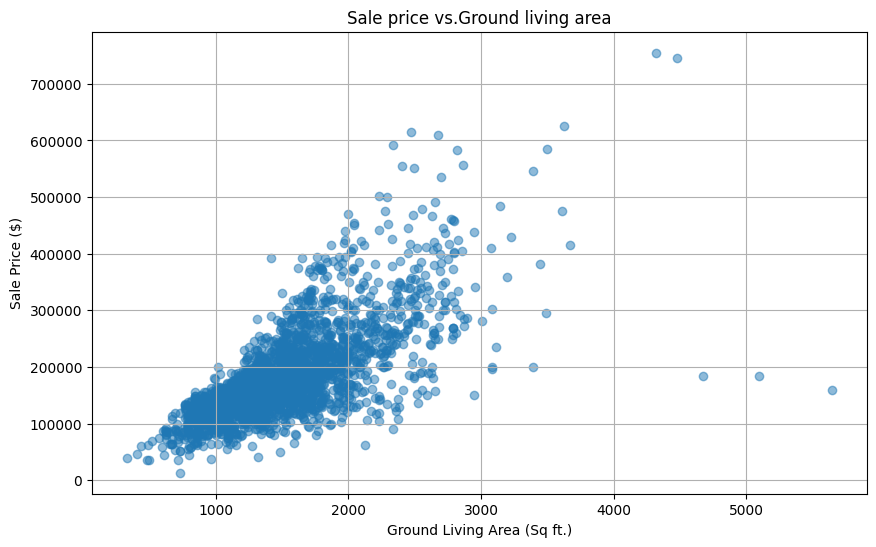

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(x=df['Gr_Liv_Area'], y=df['SalePrice'], alpha=0.5)
plt.title('Sale price vs.Ground living area')
plt.xlabel('Ground Living Area (Sq ft.)')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.show()
# YOUR CODE HERE


## II. Split Data

**Task 3:** Since you're building a model to predict the price at which a house will be sold, your target is the `'SalePrice'` column. Split the DataFrame `df` into the target vector `y` and the feature matrix `X`.

In [7]:
'''T3: Split `df` into `X` and `y`.'''

target = 'SalePrice'
# YOUR CODE HERE
X= df.drop(columns=target)
y=df[target]

**Task 3 Testing**

In [ ]:
'''T3 Tests'''
assert y.shape == (2564,), '`y` either has the wrong number of rows, or is two-dimentional.'
assert X.shape == (2564, 45), '`X` has the wrong number of columns or rows.'
assert 'SalePrice' not in X.columns, 'Target is still part of feature matrix.'

**Task 4:** Split `X` and `y` into training and validation sets. Since housing prices fluctuate over time, you should use the time-based cutoff method.

- Training: Homes sold before 2009
- Validation: Homes sold during 2009

In [8]:
'''T4: Split `X` and `y` into training and validation sets.'''
cutoff='2009'
# YOUR CODE HERE
mask= X.index < cutoff
X_train, y_train= X.loc[mask],y.loc[mask]
X_val,y_val=X.loc[~mask],y.loc[~mask]


**Task 4 Testing**

In [ ]:
'''T4 Tests'''
assert len(X_train) == len(y_train) == 1920, 'Your training set has the wrong number of rows.'
assert len(X_val) == len(y_val) == 644, 'Your validation set has the wrong number of rows.'

## III. Set Baseline

**Task 5:** Before you can create a model to predict sale price, you need to establish a baseline. First, calculate the mean housing price for your training set. Next, calculate the *mean absolute error* for a model that always predicts that mean. Be sure to assign the mean absolute error to a variable named `baseline_mae`.

In [10]:
'''T5: Calculate baseline mean absolute error.'''
from sklearn.metrics import mean_absolute_error

# YOUR CODE HERE
mean_housing_price= y_train.mean()
y_pred=[mean_housing_price]* len(y_train)
baseline_mae = mean_absolute_error(y_train,y_pred)
print('Mean Sale Price', mean_housing_price)
print('Baseline MAE:', baseline_mae)

Mean Sale Price 181515.98645833333
Baseline MAE: 58502.9394639757


**Task 5 Testing**

In [ ]:
'''T5 Tests'''
assert isinstance(baseline_mae, float), '`baseline_mae` is not a `float`. Have you assigned a value to this variable name?'

## IV. Build Models

**Task 6:** Build and train a linear regression model named `model_lr` that predicts home sale price. Your model should have the following components:

- A `OneHotEncoder` for categorical features.
- A `StandardScaler` so that you can compare your model coefficients after training.
- A `pipeline` that combines transformers and predictor.

**Tip:** For your `OneHotEncoder`, `use_cat_names` should be set to `True`.

In [11]:
'''T6: Build and train LinearRegression model.'''


# YOUR CODE HERE
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LinearRegression()
)

model_lr.fit(X_train, y_train)



Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Bldg_Type', 'Central_Air', 'Condition_1',
                                     'Condition_2', 'Electrical', 'Exter_Cond',
                                     'Exter_Qual', 'Exterior_1st',
                                     'Exterior_2nd', 'Foundation', 'Functional',
                                     'Heating', 'Heating_QC', 'House_Style',
                                     'Kitchen_Qual', 'Land_Contour',
                                     'Land_Slope', 'Lot_Config', 'Lot_Shape',
                                     'MS_Zoning', 'Mas_Vnr_Type',
                                     'Neighborhood', 'Paved_Drive', 'Roof_Matl',
                                     'Roof_Style', 'Sale_Condition',
                                     'Sale_Type', 'Street', 'Utilities'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

**Task 6 Testing**

In [ ]:
'''T6 Tests'''
from sklearn.pipeline import Pipeline
assert isinstance(model_lr, Pipeline), '`model_lr` is not a pipeline.'
assert len(model_lr.named_steps) > 1, 'Your `model_lr` pipeline is missing components.'

**Task 7:** Build and train a ridge regression model named `model_r` that predicts home sales price. Your model should include the following components:

- A `OneHotEncoder` for categorical features.
- A `StandardScaler` so that you can compare your model coefficients after training.
- A `pipeline` that combines transformers and predictor.

**Tip:** For your `Ridge` model, the `alpha` parameter should be set to a value of your choosing. Read more about the `alpha` parameter [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [12]:
'''T7. Build and train Ridge model.'''
model_r= make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    Ridge(alpha=1.0)
)

# Fit the model to the training data
model_r.fit(X_train, y_train)




Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Bldg_Type', 'Central_Air', 'Condition_1',
                                     'Condition_2', 'Electrical', 'Exter_Cond',
                                     'Exter_Qual', 'Exterior_1st',
                                     'Exterior_2nd', 'Foundation', 'Functional',
                                     'Heating', 'Heating_QC', 'House_Style',
                                     'Kitchen_Qual', 'Land_Contour',
                                     'Land_Slope', 'Lot_Config', 'Lot_Shape',
                                     'MS_Zoning', 'Mas_Vnr_Type',
                                     'Neighborhood', 'Paved_Drive', 'Roof_Matl',
                                     'Roof_Style', 'Sale_Condition',
                                     'Sale_Type', 'Street', 'Utilities'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

**Task 7 Testing**

In [ ]:
assert isinstance(model_r, Pipeline), '`model_r` is not a pipeline.'
assert len(model_r.named_steps) > 1, 'Your `model_r` pipeline is missing components.'

## V. Check Metrics

**Task 8:** Compare your models by calculating their mean absolute error for the training and validation sets. You should assign these to the variables `model_lr_training_mae`, `model_lr_validation_mae`, `model_r_training_mae`, and `model_r_validation_mae`, respectively. The validation MAE for your Ridge model should be lower than your `baseline_mae`.

In [13]:
'''T8: Compare model metrics, MAE.'''
# YOUR CODE HERE
# Predict on the training and validation sets using the Linear regression model
y_train_pred_lr=model_lr.predict(X_train)
y_val_pred_lr= model_lr.predict(X_val)

# Calculate the mean absolute error for the Linear regression model
model_lr_training_mae= mean_absolute_error(y_train,y_train_pred_lr)
model_lr_validation_mae= mean_absolute_error(y_val,y_val_pred_lr)

# Predict on the training and validation sets using the Ridge regression model
y_train_pred_r = model_r.predict(X_train)
y_val_pred_r = model_r.predict(X_val)

# Calculate the mean absolute error for the Ridge regression model
model_r_training_mae = mean_absolute_error(y_train, y_train_pred_r)
model_r_validation_mae = mean_absolute_error(y_val, y_val_pred_r)
print("Baseline mean absolute error:", baseline_mae)

print('Linear Regression Model')
print('Training MAE:', model_lr_training_mae)
print('Validation MAE:', model_lr_validation_mae)
print()
print('Ridge Regression Model')
print('Training MAE:', model_r_training_mae)
print('Validation MAE:', model_r_validation_mae)

Baseline mean absolute error: 58502.9394639757
Linear Regression Model
Training MAE: 16193.266661443517
Validation MAE: 4759621362587204.0

Ridge Regression Model
Training MAE: 16119.822691743926
Validation MAE: 17986.919803129596


**Task 8 Testing**

In [ ]:
'''T8 Tests'''
assert isinstance(model_lr_training_mae, float), '`model_lr_training_mae` is not a float. Did you assign a value to this variable?'
assert isinstance(model_lr_validation_mae, float), '`model_lr_validation_mae` is not a float. Did you assign a value to this variable?'
assert isinstance(model_r_training_mae, float), '`model_r_training_mae` is not a float. Did you assign a value to this variable?'
assert isinstance(model_r_validation_mae, float), '`model_r_validation_mae` is not a float. Did you assign a value to this variable?'

**Task 9:** Compare your two models by calculating their $R^2$ score for the **validation data**.

In [14]:
'''T9: Compare model metrics, R^2.'''
# YOUR CODE HERE
from sklearn.metrics import r2_score
model_lr_r2_score =r2_score(y_val,y_val_pred_lr)
model_r_r2_score = r2_score(y_val, y_val_pred_r)

print('Linear Regression R^2:', model_lr_r2_score)
print('Ridge Regression R^2:', model_r_r2_score)

Linear Regression R^2: -1.2971415960833563e+24
Ridge Regression R^2: 0.8887380165377928


**Task 9 Testing**

In [ ]:
'''T9 Tests'''
assert isinstance(model_lr_r2_score, float), '`model_lr_r2_score` is not a float. Did you assign a value to this variable?'
assert isinstance(model_r_r2_score, float), '`model_r_r2_score` is not a float. Did you assign a value to this variable?'
assert model_lr_r2_score <= 1, 'The maximum value for an R^2 score is 1.'
assert model_r_r2_score <= 1, 'The maximum value for an R^2 score is 1.'

**Task 10:** Based on the metrics above, choose the best of your two models and generate an array of predictions `y_pred` using the test set below.

**Note:** Make sure that you import and clean the test set *exactly the same way* you did with the training set at the start of this notebook.

In [18]:
import pandas as pd
url_test = 'https://drive.google.com/uc?export=download&id=1y9u8cOWprTjruw8E-ct1c7YaEytToqd_'
X_test = pd.read_csv(url_test, parse_dates=['Yr_Sold'])
X_test.set_index('Yr_Sold', inplace=True)

# YOUR CODE HERE

print(X_test.head())
# YOUR CODE HERE
#print(model_r.predict(X_test))
y_pred= model_r.predict(X_test)
print('My predictions:', y_pred[:3])

            1st_Flr_SF  Bedroom_AbvGr Bldg_Type  Bsmt_Full_Bath  \
Yr_Sold                                                           
2010-01-01        1656              3      1Fam             1.0   
2010-01-01         896              2      1Fam             0.0   
2010-01-01        1329              3      1Fam             0.0   
2010-01-01        2110              3      1Fam             1.0   
2010-01-01         928              3      1Fam             0.0   

            Bsmt_Half_Bath Central_Air Condition_1 Condition_2 Electrical  \
Yr_Sold                                                                     
2010-01-01             0.0           Y        Norm        Norm      SBrkr   
2010-01-01             0.0           Y       Feedr        Norm      SBrkr   
2010-01-01             0.0           Y        Norm        Norm      SBrkr   
2010-01-01             0.0           Y        Norm        Norm      SBrkr   
2010-01-01             0.0           Y        Norm        Norm      

**Task 10 Testing:** There is a hidden test in the cell below. When you submit your notebook to Canvas, your test MAE will be calculated. In order to get the point for this task, your test MAE must be below 58,000.

**Tip:** Use your validation MAE to estimate what your test MAE will be.

In [ ]:
import numpy as np
assert isinstance(y_pred, np.ndarray), '`y_pred` should be type `ndarray`.'
assert y_pred.shape == (340,), '`y_pred` should be a 1-dimentional array with 340 predictions.'
# Your test MAE will be printed out below when you submit your assignment.

**Task 11 (`stretch goal`):** There's no code to write for this task. Below is another testing cell that will calculate the MAE for your test set. In order to get the point for this task, your test MAE must be below 18,000.

**Tip:** Are there any **hyperparameters** in your model that you could adjust to improve performance?

In [21]:
assert isinstance(y_pred, np.ndarray), '`y_pred` should be type `ndarray`.'
assert y_pred.shape == (340,), '`y_pred` should be a 1-dimentional array with 340 predictions.'
# Your test MAE will be printed out below when you submit your assignment.

## VI. Explain Model

**Task 12 (`stretch goal`):** Create a horizontal barchart for your best performing model that shows the ten most important features for the model's predictions. Don't forget to label your axes!

This task will not be autograded - but it is part of completing the challenge.

In [23]:
# YOUR CODE HERE
plt.figure(figsize=(10, 8))
plt.barh(x=df[], y=df[], color=)
plt.xlabel()
plt.ylabel()
plt.title('Top 10 Most Important Features for Ridge Regression')
plt.gca().invert_yaxis()  # To display the highest coefficients on top
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-23-53393c00d1b9>, line 3)